In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy import stats
from matplotlib import cm

plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#f5f5f5'
warnings.filterwarnings('ignore')

colors2 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']


In [75]:
# 폰트
# import matplotlib.font_manager as fm
# fm.get_fontconfig_fonts()
# font_location = 'C:/Users/user/Downloads/Roboto/Roboto-Regular.ttf'
# font_name = fm.FontProperties(fname=font_location).get_name()
# plt.rc('font', family=font_name)

# %matplotlib inline

In [76]:
netflix = pd.read_csv("./netflix/netflix_titles.csv").drop(['show_id', 'cast', 'rating', 'duration', 'description', 'director', 'release_year'], axis=1)
netflix.columns = ['종류', '제목', '국가', '등록날짜', '카테고리']
df = netflix.iloc[:, [1, 0, 2, 3, 4]]

# Bird Box
# Klaus
# The Queen's Gambit
# Train to Busan
# MOTHER
# About Time
# Squid Game
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      8807 non-null   object
 1   종류      8807 non-null   object
 2   국가      7976 non-null   object
 3   등록날짜    8797 non-null   object
 4   카테고리    8807 non-null   object
dtypes: object(5)
memory usage: 344.1+ KB


In [77]:
# 전처리 - 결측값 있는 행 모두 제거
df.dropna(inplace=True)
# df.isna().sum()

# 등록날짜 datetime 형태로 변환 -> 연도만 빼서 column 생성
df["등록날짜"] = pd.to_datetime(df["등록날짜"])
df["연도"] = df["등록날짜"].dt.year
df.tail()

,제목,종류,국가,등록날짜,카테고리,연도
8801,Zinzana,Movie,"United Arab Emirates, Jordan",2016-03-09,"Dramas, International Movies, Thrillers",2016
8802,Zodiac,Movie,United States,2019-11-20,"Cult Movies, Dramas, Thrillers",2019
8804,Zombieland,Movie,United States,2019-11-01,"Comedies, Horror Movies",2019
8805,Zoom,Movie,United States,2020-01-11,"Children & Family Movies, Comedies",2020
8806,Zubaan,Movie,India,2019-03-02,"Dramas, International Movies, Music & Musicals",2019


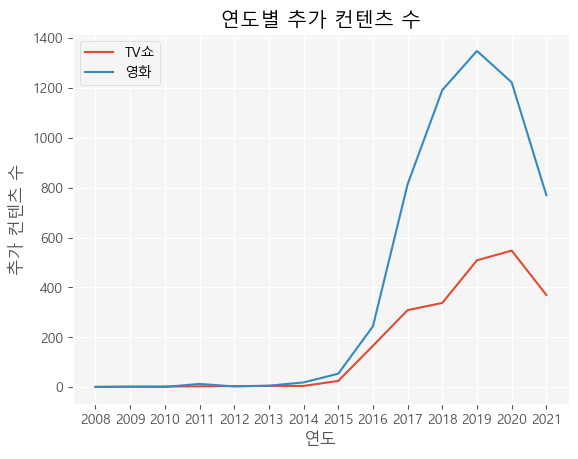

In [78]:
# 연도별 추가 컨텐츠 카운트
year = df["연도"]

type_data = df[['종류', '연도']]
# type_data.head()

TV_show = type_data[type_data["종류"] == "TV Show"].groupby('연도')['종류'].count()
Movie = type_data[type_data["종류"] == "Movie"].groupby('연도')['종류'].count()
samp = type_data.groupby('연도')['종류'].count()

# samp
# TV_show
# Movie

plt.title("연도별 추가 컨텐츠 수")
# plt.plot(list(dict(samp).keys()), list(dict(samp).values()), label="TV쇼")
plt.plot(list(dict(TV_show).keys()), list(dict(TV_show).values()), label="TV쇼")
plt.plot(list(dict(Movie).keys()), list(dict(Movie).values()), label="영화")
plt.xlabel("연도")
plt.ylabel("추가 컨텐츠 수")
plt.xticks(np.arange(2008, 2022, 1))
# ax = sns.barplot(data=app, x="별점", y="가격", ci=None)
# ax.set(ylabel="평균 가격 (단위: $)")
# plt.legend([], [], frameon=False)
plt.legend()
plt.show()

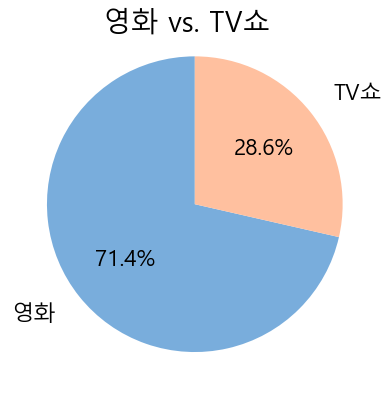

In [79]:
eda1_c = [5, 2]
label_1 = ['영화', 'TV쇼']
eda1_colors = ["#79addc", "#ffc09f", "#ffee93", "#fcf5c7", "#adf7b6", '#AECCA5']
# plt.figure(figsize=(8, 10))
plt.pie(eda1_c, labels=label_1, startangle=90, autopct='%.1f%%', colors=eda1_colors, textprops={'fontsize':16}, labeldistance=1.2)
plt.suptitle("영화 vs. TV쇼", fontsize=20, y=0.90)
plt.show()

[34146, 13656]


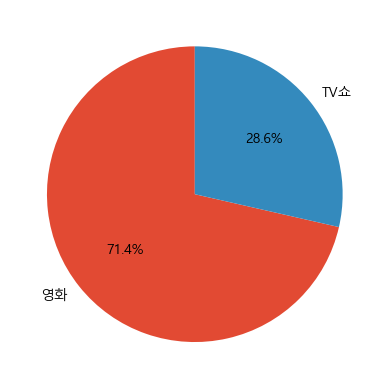

In [80]:
finale_vals = [df[df["종류"] == "Movie"].size, df[df["종류"] == "TV Show"].size]
print(finale_vals)
finale_labels = ['영화', 'TV쇼']
plt.pie(finale_vals, labels=finale_labels, startangle=90, autopct="%.1f%%")
plt.show()

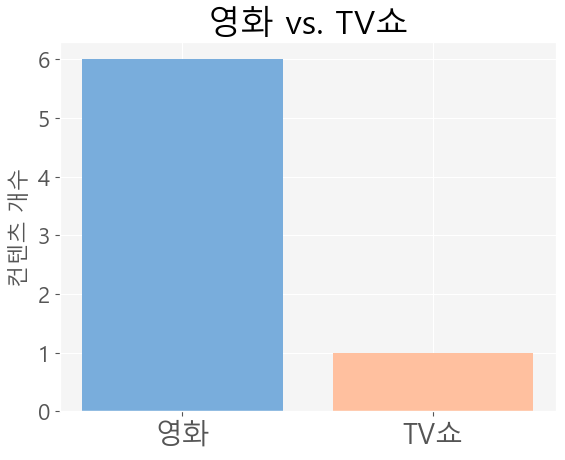

In [81]:

eda1_label = np.array(['영화', 'TV쇼'])
eda1_value = np.array([6, 1])
plt.bar(eda1_label, eda1_value, color=eda1_colors)
plt.title('영화 vs. TV쇼', fontsize=24)
plt.ylabel('컨텐츠 개수', fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=16)
plt.show()

In [82]:
# 번역
from translate import Translator
translator = Translator(to_lang="Korean")
# sample = translator.translate("United States")
# print(sample)

In [83]:
# 문제 해결
## 국가 카운팅
from collections import Counter
country_data = df['국가']
country_counting = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
top20 = country_counting[:20]
trans_top20 = []

for name in top20.index:
    trans_top20.append(translator.translate(name))

trans_top20[13] = '튀르키예'

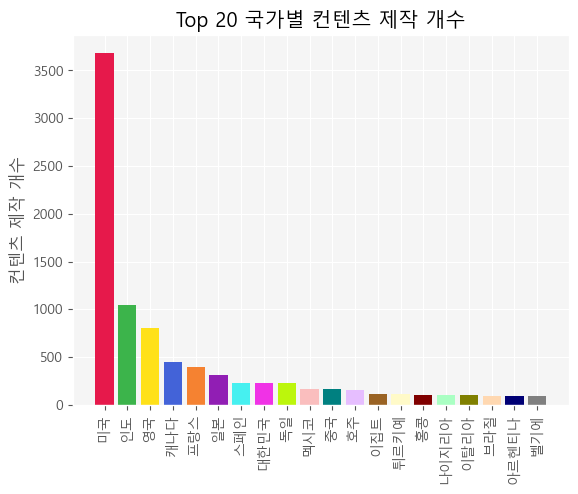

In [84]:
## 시각화
colors2 = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
plt.bar(trans_top20, top20.values, color=colors2)
plt.title("Top 20 국가별 컨텐츠 제작 개수")
plt.ylabel("컨텐츠 제작 개수")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# 한글화
from collections import Counter
from translate import Translator
translator = Translator(to_lang="Korean")

df = pd.read_csv("./netflix/netflix_titles.csv")
df.dropna(inplace=True)

# description drop, column 이름 한글화, 국가 elements 리스트로 구분
sample = pd.read_csv("./netflix/netflix_titles.csv")
sample.drop(columns=['description'], inplace=True)
sample.columns = ["id", "종류", "제목", "감독", "배우", "국가", "등록날짜", "발매년도", "심의등급", "상영시간", "카테고리"]
# sample['국가'] = sample['국가'].apply(lambda x: x[0:].split(','))
# sample.head()

# 나라이름 종합하여 모두 번역 + 리스트로 저장 (translated_countries)
country_data = df['country']
country_counting = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
top20 = country_counting[:20]
trans_countries = []

for name in country_counting.index:
    trans_countries.append(translator.translate(name))

trans_top20[13] = '튀르키예'
# print(trans_countries)

In [45]:
for idx, item in enumerate(trans_countries):
    if item == "United Arab Emirates":
        trans_countries[idx] = "아랍에미리트"
    elif item == "Turkey":
        trans_countries[idx] = "튀르키예"
    elif item == "Pakistan":
        trans_countries[idx] = "파키스탄"
    elif item == "Vatican City":
        trans_countries[idx] = "바티칸 시티"
    elif item == "Syria":
        trans_countries[idx] = "시리아"

def trans(arr):
    for country in trans_countries:
        for elem in arr:
            if elem in trans_countries:
                elem = country

print(trans_countries)

# replace NaN with empty list
sample['국가'].fillna('', inplace=True)
countries = country_counting.index.tolist()
countries

['미국', '인도', '영국', '캐나다', '프랑스', '독일', '스페인', '일본', '중국', '멕시코', '이집트', '홍콩', '나이지리아', '칠면조', '인도네시아', '호주', '필리핀', '벨기에', '대한민국', '이탈리아', '아르헨티나', '브라질', '태국', '남아공', '네덜란드', '아랍에미리트', '폴란드', '아일랜드', '덴마크', '대만', '스웨덴', '칠레', '뉴질랜드식', '레바논', '파키스탄', '말레이시아', '노르웨이', '싱가포르', '콜롬비아', '스위스', '이스라엘', '체코', '로매니아', '러시아', '불가리아', '헝가리', '우루과이', '사우디아라비아', '룩셈부르크', '오스트리아', '카타르', '아이슬란드', '페루', '세르비아', '그리이스', '베트남', '포르투갈', '조던', '캄보디아', '케냐', '쿠웨이트', '모로코', '가나', '핀란드', '이란', '방글라데시', '', '대학', '크로아티아', '슬로베니아', '소비에트 연방', '베네수엘라', '독일', '네팔', '과테말라', '케이먼제도', '시리아', '말타', '리투아니아', '건강식품', '자메이카', '스리랑카', '소말리아', '바티칸 시티', '이라크', '도미니카 공화국', '수단', '파나마', '독일', '니카라과', '리히텐슈타인', '라트비아어', '슬로바키아', '바하마', '세네갈', '모리셔스', '나미비아', '의료시술', '부르키나 파소', '모잠비크 상위', '짐바브웨', '말라위식', '에콰도르', '파라과이', '에티오피아', '금융', '그루지야', '카메룬', '버뮤다', '몬텐그로']


['United States',
 'India',
 'United Kingdom',
 'Canada',
 'France',
 'Germany',
 'Spain',
 'Japan',
 'China',
 'Mexico',
 'Egypt',
 'Hong Kong',
 'Nigeria',
 'Turkey',
 'Indonesia',
 'Australia',
 'Philippines',
 'Belgium',
 'South Korea',
 'Italy',
 'Argentina',
 'Brazil',
 'Thailand',
 'South Africa',
 'Netherlands',
 'United Arab Emirates',
 'Poland',
 'Ireland',
 'Denmark',
 'Taiwan',
 'Sweden',
 'Chile',
 'New Zealand',
 'Lebanon',
 'Pakistan',
 'Malaysia',
 'Norway',
 'Singapore',
 'Colombia',
 'Switzerland',
 'Israel',
 'Czech Republic',
 'Romania',
 'Russia',
 'Bulgaria',
 'Hungary',
 'Uruguay',
 'Saudi Arabia',
 'Luxembourg',
 'Austria',
 'Qatar',
 'Iceland',
 'Peru',
 'Serbia',
 'Greece',
 'Vietnam',
 'Portugal',
 'Jordan',
 'Cambodia',
 'Kenya',
 'Kuwait',
 'Morocco',
 'Ghana',
 'Finland',
 'Iran',
 'Bangladesh',
 '',
 'Algeria',
 'Croatia',
 'Slovenia',
 'Soviet Union',
 'Venezuela',
 'West Germany',
 'Nepal',
 'Guatemala',
 'Cayman Islands',
 'Syria',
 'Malta',
 'Lithuani

In [44]:
net = pd.read_csv("./netflix/netflix_titles.csv")
net.loc[net['country'] == 'Turkey', 'country'] = '튀르키예'
net.iloc[21]

show_id                                                       s22
type                                                      TV Show
title                                      Resurrection: Ertugrul
director                                                      NaN
cast            Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...
country                                                      튀르키예
date_added                                     September 22, 2021
release_year                                                 2018
rating                                                      TV-14
duration                                                5 Seasons
listed_in       International TV Shows, TV Action & Adventure,...
description     When a good deed unwittingly endangers his cla...
Name: 21, dtype: object